In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing

In [2]:
df = pd.read_csv('UpdatedStudentsPerformance.csv')

In [3]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74.0
1,female,group C,some college,standard,completed,69.0,90.0,88.0
2,female,group B,master's degree,standard,none,90.0,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47.0,57.0,44.0
4,male,group C,some college,standard,none,76.0,78.0,75.0
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88.0,99.0,95.0
996,male,group C,high school,free/reduced,none,62.0,55.0,55.0
997,female,group C,high school,free/reduced,completed,59.0,71.0,65.0
998,female,group D,some college,standard,completed,68.0,78.0,77.0


In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74.0
1,female,group C,some college,standard,completed,69.0,90.0,88.0
2,female,group B,master's degree,standard,none,90.0,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47.0,57.0,44.0
4,male,group C,some college,standard,none,76.0,78.0,75.0


In [5]:
df.tail()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88.0,99.0,95.0
996,male,group C,high school,free/reduced,none,62.0,55.0,55.0
997,female,group C,high school,free/reduced,completed,59.0,71.0,65.0
998,female,group D,some college,standard,completed,68.0,78.0,77.0
999,female,group D,some college,free/reduced,none,77.0,86.0,86.0


In [7]:
df.shape

(1000, 8)

In [8]:
df.dtypes

gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                     float64
reading score                  float64
writing score                  float64
dtype: object

In [9]:
df.isna().sum()

gender                          0
race/ethnicity                  0
parental level of education     0
lunch                           0
test preparation course         0
math score                     10
reading score                  15
writing score                  11
dtype: int64

In [40]:
df1 = df.fillna(df.mean(numeric_only = True))

In [41]:
df1.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

# Deal With Outliers

<Axes: xlabel='reading score'>

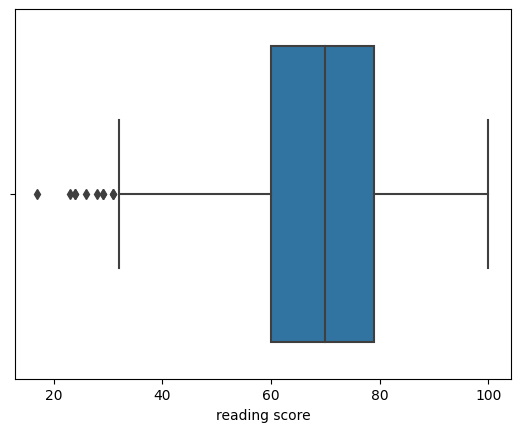

In [15]:
sns.boxplot(x='reading score',data = df1)

<Axes: xlabel='writing score'>

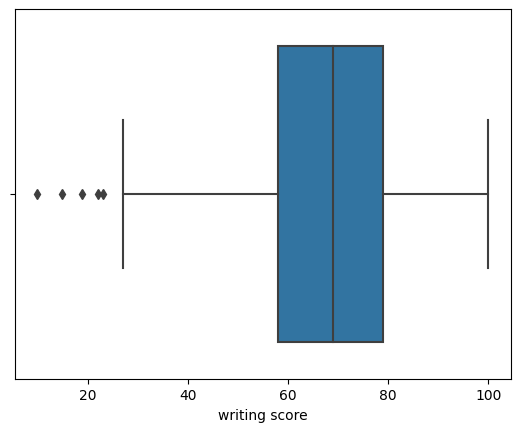

In [16]:
sns.boxplot(x='writing score',data = df1)

<Axes: xlabel='math score'>

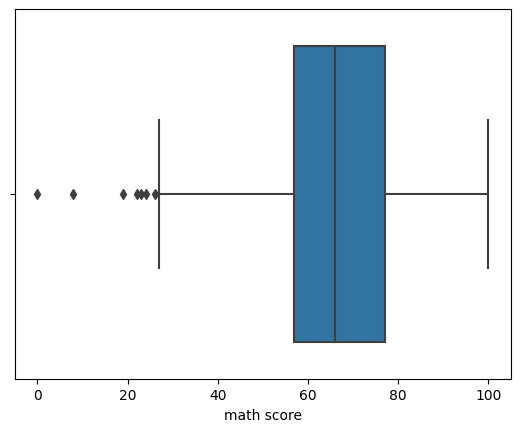

In [17]:
sns.boxplot(x='math score',data = df1)

# IQR to deal with outliers

In [43]:
df2 = pd.concat([df1['reading score'],df1['writing score'],df1['math score']],axis = 1)

In [45]:
df2.isna().sum()

reading score    0
writing score    0
math score       0
dtype: int64

In [50]:
Q1 = df2.quantile(0.25)
print("25 percentile\n",Q1)

25 percentile
 reading score    60.0
writing score    58.0
math score       57.0
Name: 0.25, dtype: float64


In [55]:
Q3 = df2.quantile(0.75)
print("75 percentile\n",Q3)

75 percentile
 reading score    79.0
writing score    79.0
math score       77.0
Name: 0.75, dtype: float64


In [56]:
IQR = Q3 - Q1
print("IQR is = \n",IQR)

IQR is = 
 reading score    19.0
writing score    21.0
math score       20.0
dtype: float64


In [57]:
low = Q1 - 1.5 * IQR
high = Q3 + 1.5 * IQR
print(low)
print(high)

reading score    31.5
writing score    26.5
math score       27.0
dtype: float64
reading score    107.5
writing score    110.5
math score       107.0
dtype: float64


In [58]:
newdf = df2[~(((df2<low)|(df2>high)).any(axis = 1))]

In [59]:
newdf

,reading score,writing score,math score
0,72.0,74.0,72.0
1,90.0,88.0,69.0
2,95.0,93.0,90.0
3,57.0,44.0,47.0
4,78.0,75.0,76.0
...,...,...,...
995,99.0,95.0,88.0
996,55.0,55.0,62.0
997,71.0,65.0,59.0
998,78.0,77.0,68.0


<Axes: >

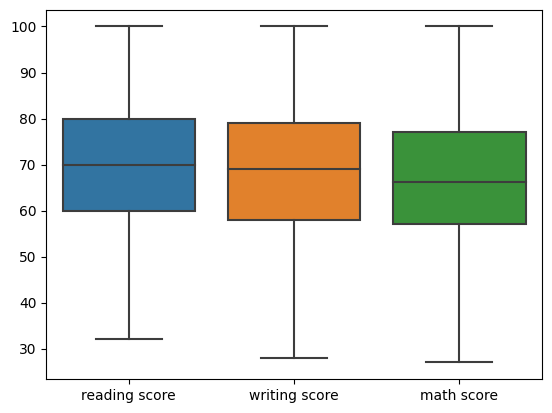

In [60]:
sns.boxplot(data = newdf)

# Z score normalization

In [64]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

z_score = scaler.fit_transform(newdf)

z_score = pd.DataFrame(z_score,columns = newdf.columns)
z_score

,reading score,writing score,math score
0,0.157906,0.367221,0.365931
1,1.460757,1.342722,0.155544
2,1.822660,1.691115,1.628255
3,-0.927802,-1.723137,-1.387295
4,0.592190,0.436900,0.646448
...,...,...,...
981,2.112182,1.830472,1.487997
982,-1.072564,-0.956672,-0.335359
983,0.085526,-0.259886,-0.545747
984,0.592190,0.576257,0.085415


# Min Max Normalization

In [65]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

MinMax = scaler.fit_transform(newdf)

MinMax = pd.DataFrame(MinMax,columns = newdf.columns)

MinMax

,reading score,writing score,math score
0,0.588235,0.638889,0.616438
1,0.852941,0.833333,0.575342
2,0.926471,0.902778,0.863014
3,0.367647,0.222222,0.273973
4,0.676471,0.652778,0.671233
...,...,...,...
981,0.985294,0.930556,0.835616
982,0.338235,0.375000,0.479452
983,0.573529,0.513889,0.438356
984,0.676471,0.680556,0.561644
